In [155]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy 

In [156]:
df = pd.read_csv('DatosPrueba.csv', delimiter=';')
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,"45,0",Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,"46,2306","-112,1138",1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,"47,034331","-112,561071",0
1,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,"24,74",Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,"40,7491","-95,038",7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,"40,275891","-96,011548",0
2,2019-01-01 00:21:32,4334230547694630,fraud_Bruen-Yost,misc_pos,"6,85",Scott,Martin,M,7483 Navarro Flats,Freedom,...,"43,0172","-111,0292",471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,1325377292,"43,753735","-111,454923",0
3,2019-01-01 00:22:44,630412733309,fraud_Torphy-Goyette,shopping_pos,"66,21",Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,...,"46,368","-87,9938",1038,Armed forces training and education officer,1964-04-22,20f048d3907dbb9978e23bee7b7578ce,1325377364,"46,412038","-88,516663",0
4,2019-01-01 00:23:58,374125201044065,"fraud_Bahringer, Schoen and Corkery",shopping_pos,"9,03",Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,"38,9757","-77,0282",601723,"Optician, dispensing",1970-07-20,c733711c521c41c578f4a964d8350df0,1325377438,"38,880898","-76,44111600000002",0


In [157]:
print("Nama Kolom:")
print(df.columns.tolist())

print("\nBaris Pertama:")
print(df.iloc[0])

Nama Kolom:
['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Baris Pertama:
trans_date_trans_time                   2019-01-01 00:01:16
cc_num                                     3534093764340240
merchant                 fraud_Kutch, Hermiston and Farrell
category                                      gas_transport
amt                                                    45,0
first                                                Jeremy
last                                                  White
gender                                                    M
street                          9443 Cynthia Court Apt. 038
city                                                Boulder
state                                                    MT
zip                                                   59632
lat               

In [158]:
# Replace commas with dots and convert to float
df['amt'] = df['amt'].str.replace(',', '.').astype(float)
df['lat'] = df['lat'].str.replace(',', '.').astype(float)
df['long'] = df['long'].str.replace(',', '.').astype(float)
df['merch_lat'] = df['merch_lat'].str.replace(',', '.').astype(float)
df['merch_long'] = df['merch_long'].str.replace(',', '.').astype(float)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200881 entries, 0 to 200880
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  200881 non-null  object 
 1   cc_num                 200881 non-null  int64  
 2   merchant               200881 non-null  object 
 3   category               200881 non-null  object 
 4   amt                    200881 non-null  float64
 5   first                  200881 non-null  object 
 6   last                   200881 non-null  object 
 7   gender                 200881 non-null  object 
 8   street                 200881 non-null  object 
 9   city                   200881 non-null  object 
 10  state                  200881 non-null  object 
 11  zip                    200881 non-null  int64  
 12  lat                    200881 non-null  float64
 13  long                   200881 non-null  float64
 14  city_pop               200881 non-nu

In [160]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [161]:
df.duplicated().sum()

0

In [162]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.008810e+05,200881.000000,200881.000000,200881.000000,200881.000000,2.008810e+05,2.008810e+05,200881.000000,200881.000000,200881.000000
mean,4.156141e+17,85.128618,48826.911331,38.545014,-90.242478,8.920038e+04,1.349255e+09,38.545281,-90.241478,0.037365
std,1.306632e+18,180.409147,26914.330746,5.090472,13.794411,3.019086e+05,1.287819e+07,5.124502,13.805559,0.189656
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.033288,-166.671242,0.000000
25%,1.800429e+14,9.840000,26237.000000,34.668900,-96.809400,7.430000e+02,1.338724e+09,34.751817,-96.926922,0.000000
50%,3.521417e+15,48.860000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349299e+09,39.352830,-87.453214,0.000000
75%,4.642255e+15,86.650000,72042.000000,41.948800,-80.175200,2.032800e+04,1.359589e+09,41.964456,-80.249053,0.000000
max,4.992346e+18,14467.640000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.958751,1.000000


In [163]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
1,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,24.74,Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,40.7491,-95.0380,7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,40.275891,-96.011548,0
2,2019-01-01 00:21:32,4334230547694630,fraud_Bruen-Yost,misc_pos,6.85,Scott,Martin,M,7483 Navarro Flats,Freedom,...,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,1325377292,43.753735,-111.454923,0
3,2019-01-01 00:22:44,630412733309,fraud_Torphy-Goyette,shopping_pos,66.21,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,...,46.3680,-87.9938,1038,Armed forces training and education officer,1964-04-22,20f048d3907dbb9978e23bee7b7578ce,1325377364,46.412038,-88.516663,0
4,2019-01-01 00:23:58,374125201044065,"fraud_Bahringer, Schoen and Corkery",shopping_pos,9.03,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,38.9757,-77.0282,601723,"Optician, dispensing",1970-07-20,c733711c521c41c578f4a964d8350df0,1325377438,38.880898,-76.441116,0


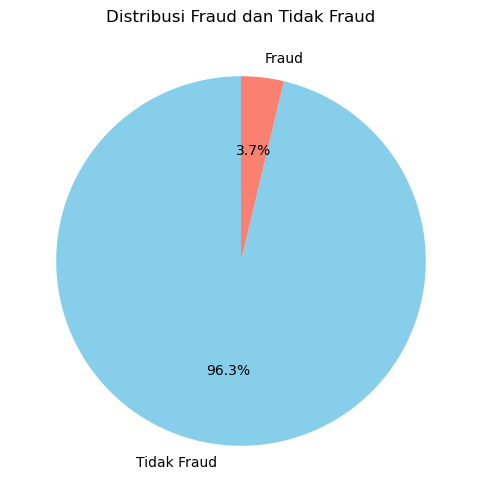

In [164]:
# Hitung jumlah fraud dan tidak fraud
fraud_counts = df['is_fraud'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
fraud_counts.plot.pie(autopct='%1.1f%%', labels=['Tidak Fraud', 'Fraud'], colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribusi Fraud dan Tidak Fraud')
plt.ylabel('')  # Menghilangkan label y
plt.show()

In [179]:
# Group by state and count the number of fraud cases
fraud_by_state = df[df['is_fraud'] == 1].groupby('state').size().sort_values(ascending=False)
fraud_by_state = fraud_by_state.head(10)

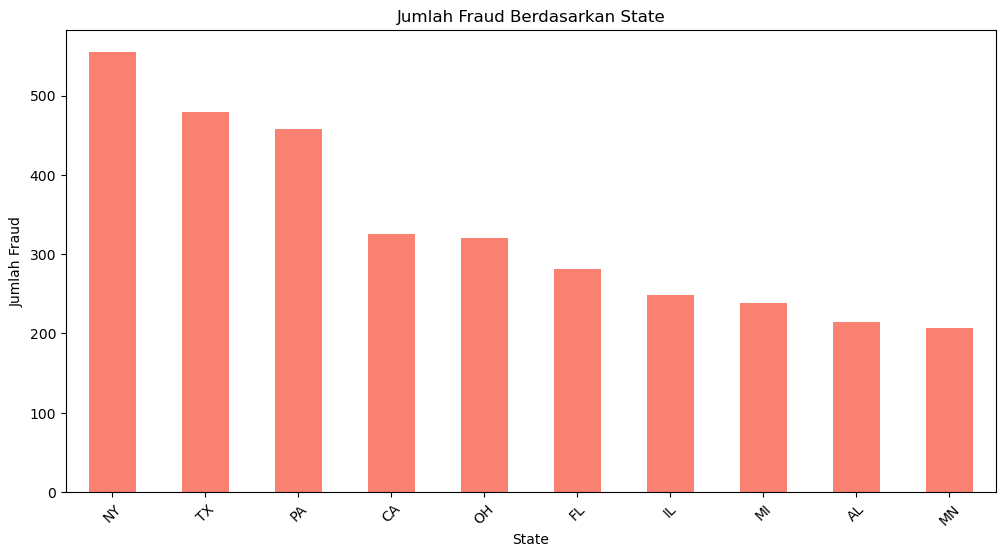

In [180]:
# Plot the data
plt.figure(figsize=(12, 6))
fraud_by_state.plot(kind='bar', color='salmon')
plt.title('Jumlah Fraud Berdasarkan State')
plt.xlabel('State')
plt.ylabel('Jumlah Fraud')
plt.xticks(rotation=45)
plt.show()

In [166]:
# Convert dob to datetime
df['dob'] = pd.to_datetime(df['dob'])
latest_date = pd.to_datetime(df['trans_date_trans_time'].max())  # Ensure latest_date is a datetime object

# Calculate age using the latest_date
df['age'] = (latest_date - df['dob']).dt.days // 365

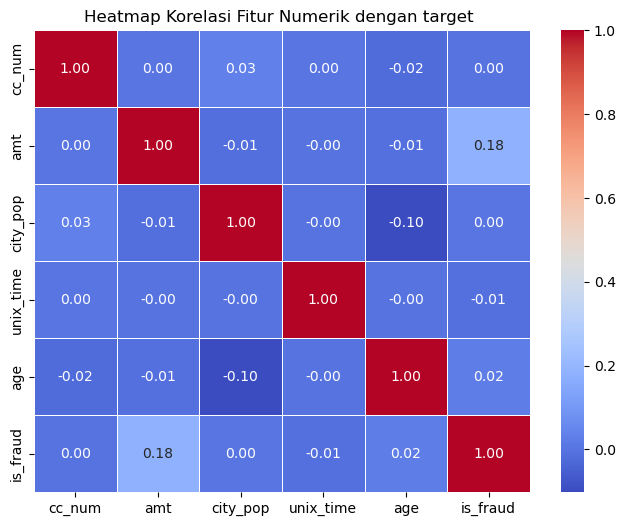

In [167]:

# Pilih kolom numerik + target
num_cols = ['cc_num', 'amt', 'city_pop', 'unix_time','age']
corr_matrix = df[num_cols + ['is_fraud']].corr(method='kendall')

# Visualisasi semua korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik dengan target ')
plt.show()


### Insight dari Heatmap Korelasi

Berdasarkan heatmap korelasi di atas, berikut adalah beberapa insight yang dapat diambil:

1. **Korelasi antara `cc_num` dan `is_fraud`**:
    - Nilai korelasi sebesar **0.000882**, yang menunjukkan bahwa hubungan antara nomor kartu kredit (`cc_num`) dan target (`is_fraud`) sangat lemah atau hampir tidak ada korelasi.

2. **Korelasi antara `amt` (jumlah transaksi) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.179426**, yang menunjukkan adanya korelasi positif lemah. Artinya, semakin besar jumlah transaksi, kemungkinan terjadinya fraud sedikit meningkat.

3. **Korelasi antara `city_pop` (populasi kota) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.002770**, yang menunjukkan hubungan yang sangat lemah antara populasi kota dan kejadian fraud.

4. **Korelasi antara `unix_time` (waktu transaksi) dan `is_fraud`**:
    - Nilai korelasi sebesar **-0.010176**, yang menunjukkan hubungan negatif yang sangat lemah. Artinya, waktu transaksi hampir tidak memengaruhi kejadian fraud.

    - **Korelasi antara `age` (usia) dan `is_fraud`**:  
        - Nilai korelasi sebesar **0.023149**, yang menunjukkan hubungan positif yang sangat lemah. Artinya, usia seseorang hampir tidak memengaruhi kemungkinan terjadinya fraud.  

In [168]:
from scipy.stats import chi2_contingency

# Fungsi Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

# cat columns merupakan kolom yang bukan anggota num_cols
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Hitung Cramer's V untuk setiap kolom kategorikal terhadap target
cramers_result = {}
for col in cat_cols:
    cramers_result[col] = cramers_v(df[col], df['is_fraud'])

# Ubah jadi DataFrame biar rapi
cramers_df = pd.DataFrame.from_dict(cramers_result, orient='index', columns=['Cramer\'s V']).sort_values(by="Cramer's V", ascending=False)
print(cramers_df)


                       Cramer's V
trans_num                1.000000
trans_date_trans_time    0.998788
street                   0.350966
city                     0.318049
job                      0.208270
last                     0.196292
first                    0.181021
merchant                 0.180191
category                 0.173989
state                    0.051480
gender                   0.019010


/var/folders/bd/r5t85swn1w3gyg6xj2fq55g00000gn/T/ipykernel_19185/2061919819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')


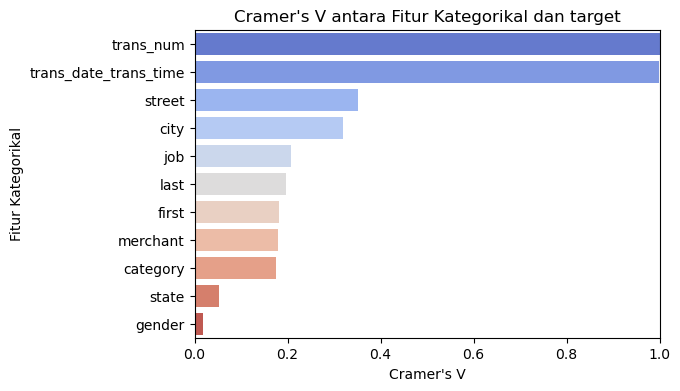

In [181]:
plt.figure(figsize=(6, 4))
sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')
plt.title("Cramer's V antara Fitur Kategorikal dan target")
plt.xlabel("Cramer's V")
plt.ylabel("Fitur Kategorikal")
plt.xlim(0, 1)
plt.show()

### Insight dari Tabel Kategori

Berdasarkan tabel kategori di atas, berikut adalah beberapa insight yang dapat diambil:

1. **Kolom `trans_num`**:
    - Memiliki nilai **Cramer's V sebesar 1.0**, yang menunjukkan korelasi yang sangat tinggi dengan target (`is_fraud`). Hal ini mengindikasikan bahwa setiap transaksi memiliki nomor unik yang dapat secara langsung mengidentifikasi kejadian fraud.

2. **Kolom `trans_date_trans_time`**:
    - Memiliki nilai **Cramer's V sebesar 0.9988**, yang juga menunjukkan korelasi yang sangat tinggi dengan target. Waktu transaksi dapat menjadi indikator penting dalam mendeteksi pola fraud.

3. **Kolom `street` dan `dob`**:
    - Memiliki nilai **Cramer's V masing-masing sebesar 0.3510 dan 0.3479**, yang menunjukkan korelasi sedang dengan target. Informasi alamat dan tanggal lahir mungkin memberikan petunjuk tambahan terkait pola fraud.

4. **Kolom `merchant` dan `category`**:
    - Memiliki nilai **Cramer's V sebesar 0.1802 dan 0.1740**, yang menunjukkan korelasi lemah dengan target. Namun, kategori produk dan merchant tertentu mungkin lebih rentan terhadap kejadian fraud.

5. **Kolom `gender` dan `state`**:
    - Memiliki nilai **Cramer's V sebesar 0.0190 dan 0.0515**, yang menunjukkan korelasi yang sangat lemah dengan target. Hal ini mengindikasikan bahwa jenis kelamin dan lokasi negara bagian tidak terlalu berpengaruh terhadap kejadian fraud.

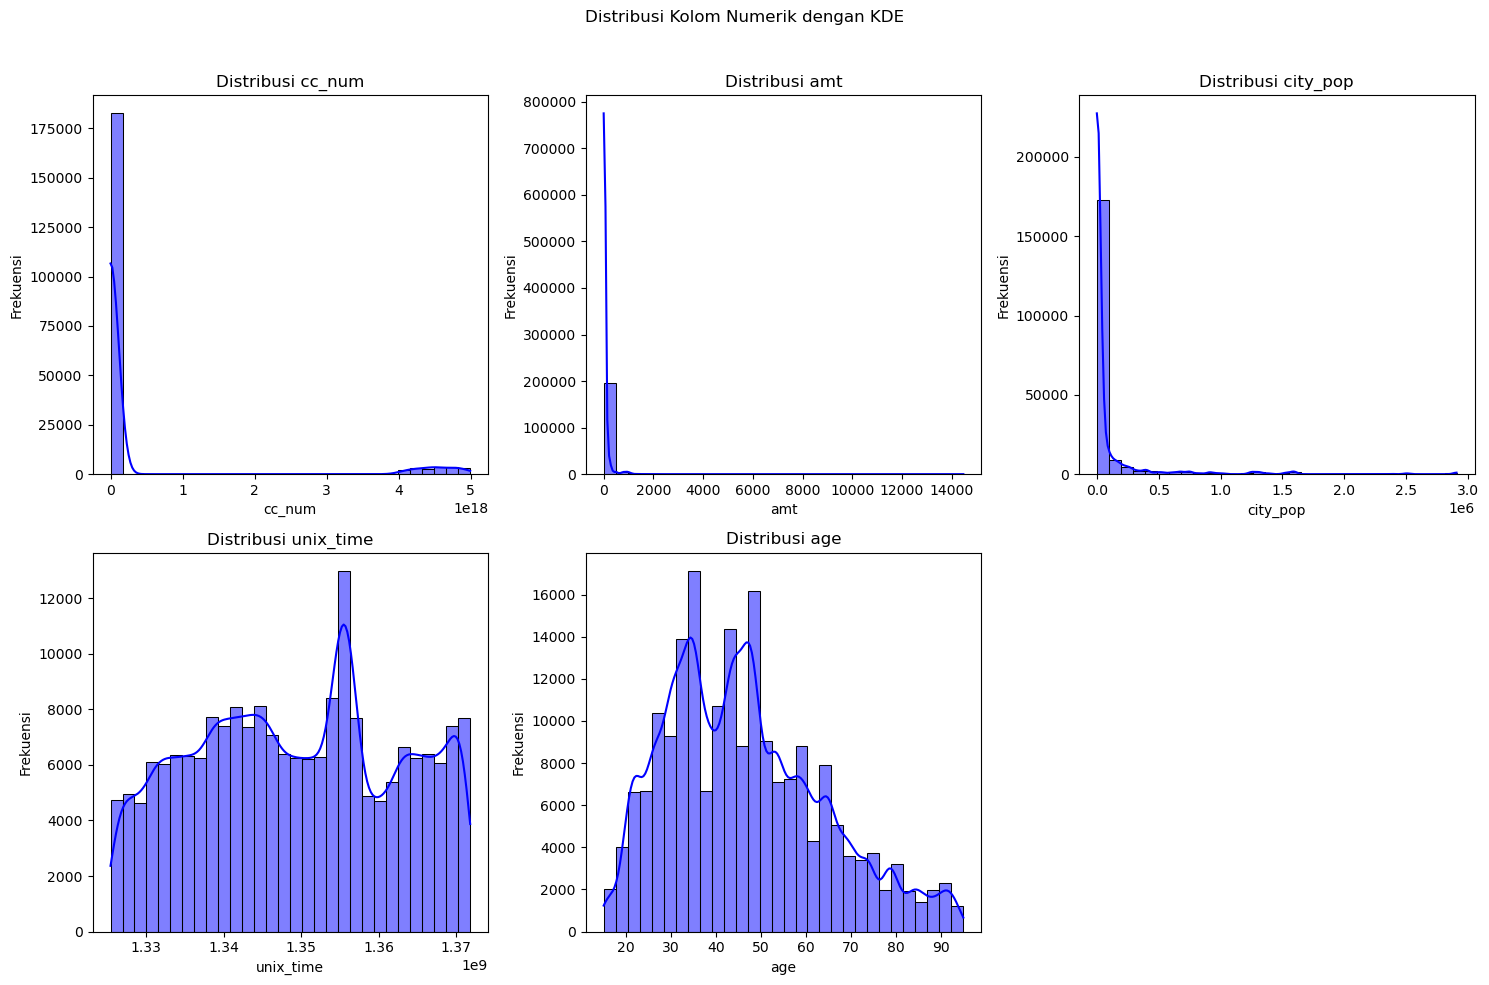

In [170]:
# Plot histogram dengan KDE untuk melihat skewness
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.suptitle("Distribusi Kolom Numerik dengan KDE")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Insight dari Distribusi Data

Berdasarkan distribusi data yang diberikan, berikut adalah beberapa insight yang dapat diambil:

1. **Kolom `amt` (Jumlah Transaksi)**:
    - Distribusi data menunjukkan bahwa sebagian besar transaksi memiliki jumlah yang kecil, dengan beberapa outlier pada jumlah transaksi yang besar. Hal ini mengindikasikan bahwa transaksi dengan jumlah besar mungkin lebih jarang terjadi.

2. **Kolom `lat` dan `long` (Koordinat Lokasi)**:
    - Data lokasi menunjukkan distribusi yang cukup merata, mencakup berbagai wilayah geografis. Namun, beberapa lokasi mungkin lebih sering muncul, tergantung pada konsentrasi populasi atau aktivitas transaksi.

3. **Kolom `city_pop` (Populasi Kota)**:
    - Sebagian besar transaksi terjadi di kota-kota dengan populasi kecil hingga menengah. Kota dengan populasi besar mungkin memiliki lebih banyak transaksi, tetapi distribusinya lebih tersebar.

4. **Kolom `merch_lat` dan `merch_long` (Koordinat Lokasi Merchant)**:
    - Lokasi merchant juga menunjukkan distribusi yang luas, mencerminkan keberadaan merchant di berbagai wilayah. Beberapa merchant mungkin lebih sering muncul, terutama di area dengan aktivitas ekonomi tinggi.

5. **Kolom `is_fraud` (Indikator Fraud)**:
    - Distribusi data menunjukkan bahwa kasus fraud relatif jarang dibandingkan dengan transaksi normal. Hal ini sesuai dengan sifat data fraud yang biasanya imbalanced.

6. **Kolom `hour` (Jam Transaksi)**:
    - Distribusi jam transaksi menunjukkan pola tertentu, seperti puncak aktivitas pada jam-jam tertentu. Hal ini dapat memberikan wawasan tentang waktu-waktu yang lebih rawan terhadap fraud.

7. **Kolom `job` (Pekerjaan)**:
    - Beberapa pekerjaan, seperti "Materials engineer" dan "Trading standards officer," memiliki jumlah transaksi fraud yang lebih tinggi. Hal ini dapat memberikan indikasi tentang kelompok pekerjaan yang lebih rentan terhadap fraud.

8. **Kolom `merchant` (Merchant)**:
    - Merchant tertentu, seperti "fraud_Rau and Sons" dan "fraud_Cormier LLC," memiliki jumlah kasus fraud yang lebih tinggi. Hal ini menunjukkan bahwa merchant-merchant ini mungkin lebih sering menjadi target fraud atau memiliki kelemahan dalam sistem keamanan mereka.

9. **Kolom `cc_num` (Nomor Kartu Kredit)**:
    - Beberapa nomor kartu kredit, seperti "4792627764422477317," memiliki jumlah transaksi yang sangat tinggi. Hal ini dapat mengindikasikan potensi penyalahgunaan atau aktivitas yang mencurigakan pada kartu tersebut.

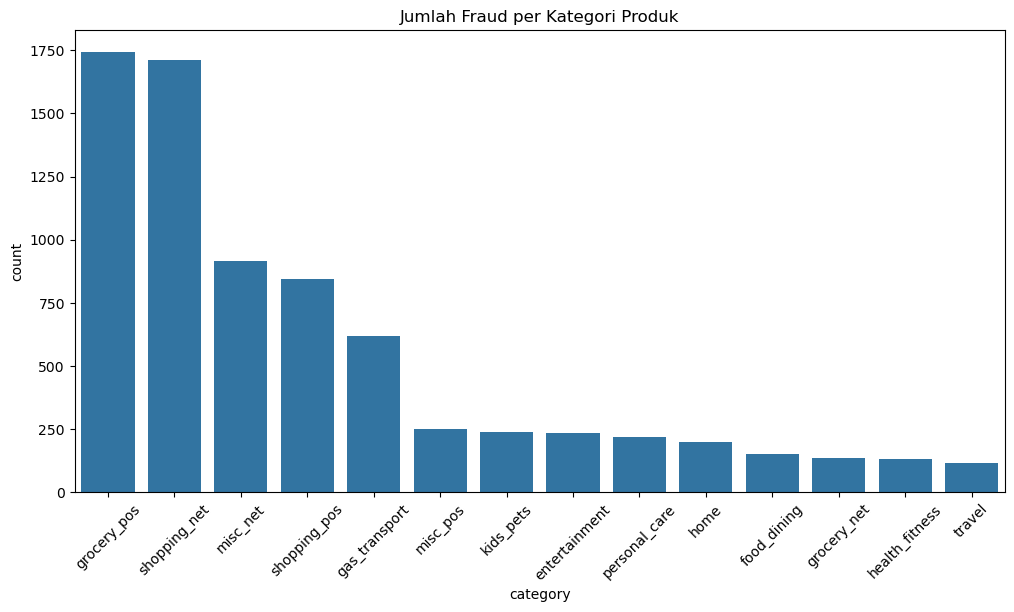

In [171]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['is_fraud'] == 1], x='category', order=df[df['is_fraud'] == 1]['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Jumlah Fraud per Kategori Produk')
plt.show()


In [172]:
df['age'].describe()

count    200881.000000
mean         46.361786
std          17.483189
min          15.000000
25%          33.000000
50%          44.000000
75%          58.000000
max          95.000000
Name: age, dtype: float64

In [173]:
df['age'].min(), df['age'].max()

(15, 95)

In [174]:
# Step 1: Bikin age_group
bins = [15, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['15-25 tahun', '26-35 tahun', '36-45 tahun', '46-55 tahun', 
          '56-65 tahun', '66-75 tahun', '76-85 tahun', '86-95 tahun']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Step 2: Filter fraud case
fraud_data = df[df['is_fraud'] == 1]

# Step 3: Group dan count
fraud_counts = fraud_data.groupby(['age_group', 'gender']).size().reset_index(name='jumlah_fraud')

# Step 4: Tampilkan hasil
print(fraud_counts)


      age_group gender  jumlah_fraud
0   15-25 tahun      F           398
1   15-25 tahun      M           369
2   26-35 tahun      F           741
3   26-35 tahun      M           679
4   36-45 tahun      F           495
5   36-45 tahun      M           664
6   46-55 tahun      F           655
7   46-55 tahun      M           787
8   56-65 tahun      F           670
9   56-65 tahun      M           583
10  66-75 tahun      F           324
11  66-75 tahun      M           273
12  76-85 tahun      F           241
13  76-85 tahun      M           275
14  86-95 tahun      F           195
15  86-95 tahun      M           134


/var/folders/bd/r5t85swn1w3gyg6xj2fq55g00000gn/T/ipykernel_19185/1288989359.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = fraud_data.groupby(['age_group', 'gender']).size().reset_index(name='jumlah_fraud')


In [175]:
# Tampilkan top 5 fraud counts
top_5_fraud_counts = fraud_counts.sort_values(by='jumlah_fraud', ascending=False).head(5)
print(top_5_fraud_counts)


     age_group gender  jumlah_fraud
7  46-55 tahun      M           787
2  26-35 tahun      F           741
3  26-35 tahun      M           679
8  56-65 tahun      F           670
5  36-45 tahun      M           664


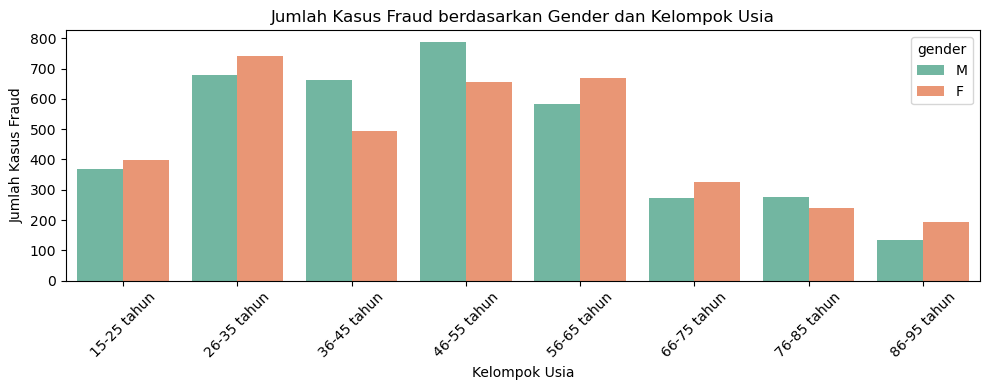

In [176]:
plt.figure(figsize=(10, 4))
sns.barplot(
    data=fraud_counts.sort_values(by='jumlah_fraud', ascending=False),
    x='age_group',
    y='jumlah_fraud',
    hue='gender',
    palette='Set2'
)
plt.title('Jumlah Kasus Fraud berdasarkan Gender dan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Kasus Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Rekomendasi Berdasarkan Gender dan Kelompok Usia

1. **Kelompok Usia dengan Kasus Fraud Tertinggi**:
  - Fokuskan pengawasan pada kelompok usia **26-55 tahun**, terutama pada gender yang mendominasi kasus fraud di kelompok usia tersebut.
  - Lakukan edukasi dan kampanye kesadaran keamanan transaksi kepada kelompok usia ini, seperti cara mengenali tanda-tanda fraud dan melindungi data pribadi.

2. **Perbedaan Berdasarkan Gender**:
  - Perhatikan gender yang lebih dominan dalam kasus fraud pada setiap kelompok usia.
  - Sesuaikan strategi pencegahan berdasarkan pola perilaku dan kebiasaan transaksi dari masing-masing gender, misalnya dengan memberikan notifikasi atau peringatan yang lebih personal.

3. **Strategi Pencegahan**:
  - Implementasikan sistem deteksi fraud berbasis usia dan gender untuk meningkatkan akurasi prediksi.
  - Tingkatkan pengawasan pada kelompok usia dan gender yang memiliki risiko lebih tinggi, misalnya dengan memanfaatkan machine learning untuk mendeteksi pola transaksi mencurigakan.
  - Kolaborasi dengan institusi keuangan untuk memperkuat sistem keamanan transaksi, terutama untuk kelompok usia yang rentan.

4. **Monitoring dan Evaluasi**:
  - Lakukan monitoring secara berkala terhadap pola transaksi dari kelompok usia dan gender tertentu.
  - Evaluasi efektivitas strategi pencegahan yang telah diterapkan dan lakukan penyesuaian jika diperlukan.


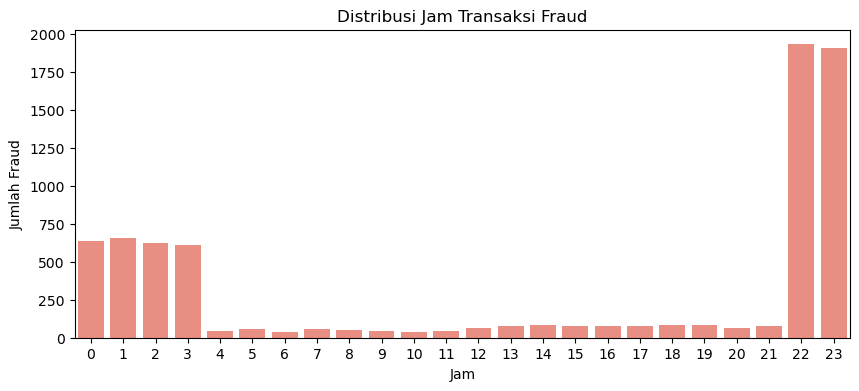

In [182]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

# Filter hanya data fraud
fraud_data = df[df['is_fraud'] == 1]

plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=fraud_data, color='salmon')
plt.title('Distribusi Jam Transaksi Fraud')
plt.xlabel('Jam')
plt.ylabel('Jumlah Fraud')
plt.show()


Berikut adalah insight dari visualisasi distribusi jam transaksi dan fraud:
1. **Fraud Berdasarkan Jam Transaksi**:
    - Fraud cenderung terjadi pada jam-jam tertentu, yang mungkin menunjukkan pola atau celah keamanan yang dimanfaatkan oleh pelaku fraud.
    - Misalnya, jika fraud lebih sering terjadi pada malam hari, hal ini dapat mengindikasikan bahwa pelaku memanfaatkan waktu ketika pengawasan lebih lemah.

3. **Rekomendasi**:
    - Perkuat pengawasan dan sistem deteksi fraud pada jam-jam rawan.
    - Gunakan model prediktif yang mempertimbangkan waktu transaksi sebagai salah satu fitur penting untuk mendeteksi potensi fraud.


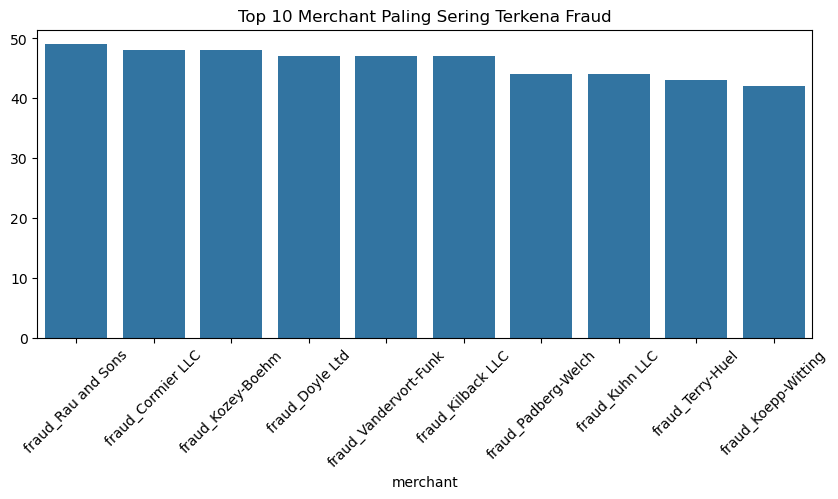

In [178]:
fraud_merchants = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=fraud_merchants.index, y=fraud_merchants.values)
plt.xticks(rotation=45)
plt.title('Top 10 Merchant Paling Sering Terkena Fraud')
plt.show()


In [183]:
# Filter data dengan fraud == 1 dan hitung jumlah kasus berdasarkan pekerjaan
fraud_jobs = df[df['is_fraud'] == 1]['job'].value_counts()

# Tampilkan hasil
print(fraud_jobs)

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64


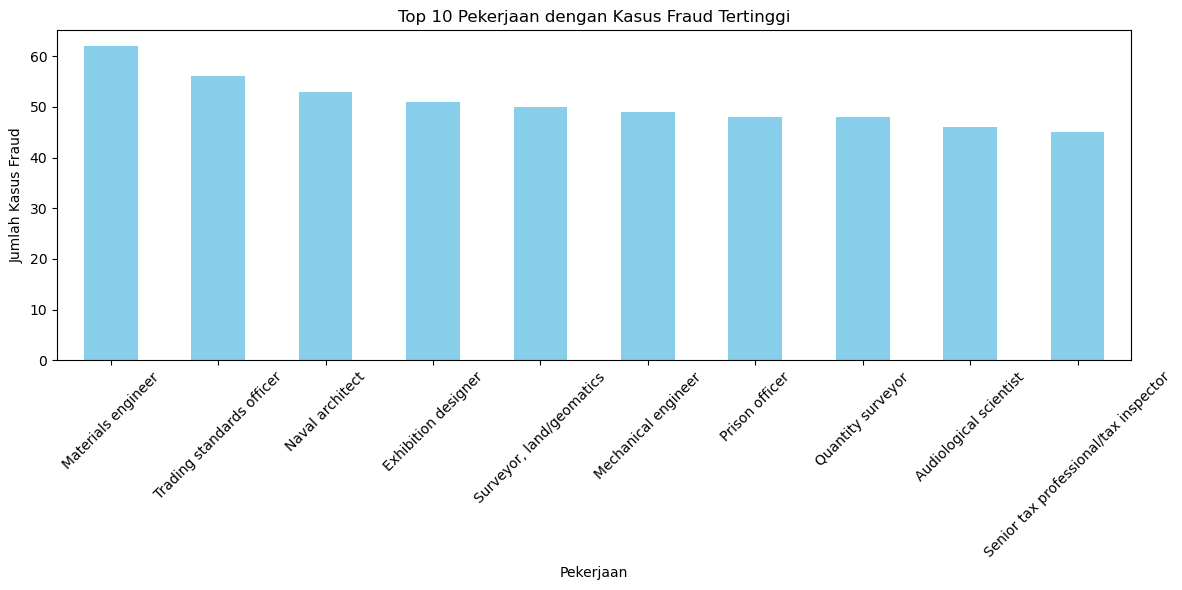

In [184]:
# Plot jumlah kasus fraud berdasarkan pekerjaan
plt.figure(figsize=(12, 6))
fraud_jobs.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Pekerjaan dengan Kasus Fraud Tertinggi')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Kasus Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()